In [1]:
from scipy import optimize
import math
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import fmin_cobyla

Предпирятие производит продукцию. Выпуск задан функцией $$ F(K,S,L) = K^\alpha * S^\beta * L^{1-\alpha-\beta}$$ 
$K$ — стоимость оборудования, тыс. руб. \
$S$ — инвестиции, тыс. руб. \
$L$ — затраты труда, в чел.-час. \
$\alpha$ = 0.3 \
$\beta$ = 0.4 \
Обслуживание оборудования обходится в $\textbf{a}$% от его стоимости, выплаты
по кредиту - $\textbf{b}$%, чел.-час. стоит $\textbf{d}$ руб. Цена 1 ед. продукции - $\textbf{P}$ руб. \
Как распорядиться суммой в 1 млн. руб., чтобы добиться максимальной
выручки? Сколько привлечь инвестиций, на какую сумму закупить оборудования, сколько потребуется чел.-час?

In [2]:
alpha = 0.3
beta = 0.4
a = 6
b = 8
d = 100
P = 150

Выручка составит, тыс. руб $$ 150F(K,S,L) = 150K^{0.3}S^{0.4}L^{0.3} $$ 

Затраты равны, тыс. руб $$0.06K + 0.08S + 0.1L$$ 
$0.06K$ — обслуживание оборудования \
$0.08S$ — проценты по кредиту \
$0.1L$ — заработная плата (100руб = 0.1тыс.руб)

Получаем задачу $$
\begin{cases} 
150K^{0.3}S^{0.4}L^{0.3} \rightarrow max \\
0.06K + 0.08S + 0.1L = 1000 \\
K\ge0 \\
S\ge0 \\
L\ge0 \\
\end{cases} $$

### Mетод множителей Лагранжа

Функция Лагранжа $$150K^{0.3}S^{0.4}L^{0.3} - \lambda(0.06K + 0.08S + 0.1L - 1000)\longrightarrow max \\ \text{где } \lambda \text { — множитель Лагранжа} $$ 

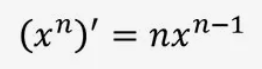

Находим частные производные и, приравнивая их к нулю, получаем систему уравнений
\begin{cases}
45K^{-0.7}S^{0.4}L^{0.3} - 0.06\lambda = 0\\
60K^{0.3}S^{-0.6}L^{0.3} - 0.08\lambda = 0\\
45K^{0.3}S^{0.4}L^{-0.7} - 0.1\lambda = 0 \\
0.06K + 0.08S + 0.1L = 1000 \\
\end{cases} 

После уножения соответствующих столбцов на 100/6, 100/8 и 10 получаем
\begin{cases}
750K^{-0.7}S^{0.4}L^{0.3} - \lambda = 0 \\
750K^{0.3}S^{-0.6}L^{0.3} - \lambda = 0 \\
450K^{0.3}S^{0.4}L^{-0.7} - \lambda = 0 \\
0.06K + 0.08S + 0.1L = 1000 \\
\end{cases} 

Из 1-го и 2-го уравнения $K^{-0.7}S^{0.4}L^{0.3} = K^{0.3}S^{-0.6}L^{0.3} \text{, откуда} \text{ } S = K $

Из 2-го и 3-го уравнения $ K^{0.3}S^{-0.6}L^{0.3} = 0.6K^{0.3}S^{0.4}L^{-0.7} \text{, откуда} \text{ } L = 0.6S $

Подставив в 4-е уравнение получаем $ 0.06S + 0.08S + 0.1(0.6S) = 1000 \text{, откуда} \text{ } S = 5000 \text{, тогда K = 5000, L = 3000} $

####   Ответ: Следует приобрести оборудование на 5 млн. руб., привлечь инфестиций 5 млн. руб. и затратить 3 тыс. чел.-час.

In [3]:
K = 5000
S = 5000
L = 3000

Проверка результата. Вычислим затраты, тыс.руб, $0.06K + 0.08S + 0.1L = 1000 $

In [4]:
0.06*S + 0.08*K + 0.1*L           # 1000 тыс.руб = 1млн руб

1000.0

In [5]:
round(150*pow(K,0.3)*pow(S,0.4)*pow(L,0.3), 0)

643438.0

Посчитаем выручку, тыс.руб, $150K^{0.3}S^{0.4}L^{0.3} $:

In [6]:
round(150*pow(K,0.3)*pow(S,0.4)*pow(L,0.3)/1000, 0)

643.0

Функция минимизации $$-150K^{0.3}S^{0.4}L^{0.3} - 0.06K - 0.08S - 0.1L + 1000\longrightarrow min $$ 

In [7]:
# def function(K,S,L):
#     return 150*np.power(K,0.3)*np.power(S,0.4)*np.power(L,0.3)/1000 + 0.06*S + 0.08*K + 0.1*L - 1000

Функция Лагранжа $$150K^{0.3}S^{0.4}L^{0.3} - \lambda(0.06K + 0.08S + 0.1L - 1000)\longrightarrow max \\ \text{где } \lambda \text { — множитель Лагранжа} $$ 

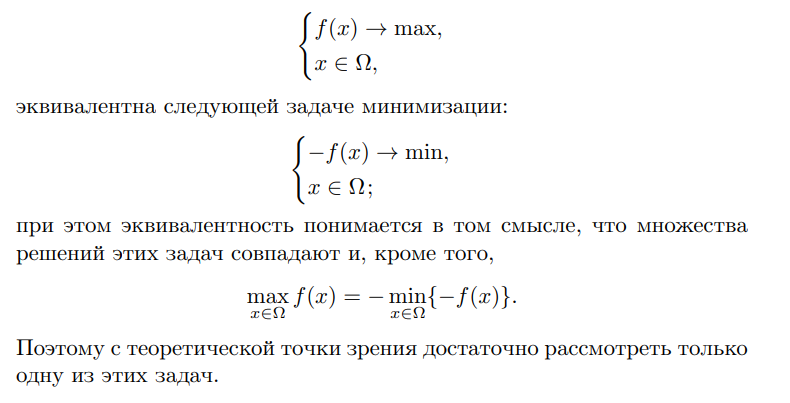

Функция Лагранжа $$150K^{0.3}S^{0.4}L^{0.3} + 0.06K + 0.08S + 0.1L - 1000\longrightarrow max $$ 

In [8]:
def f_4(x):                # x[0]-K     x[1]-S     x[2]-L
    return 150*np.power(x[0],0.3)*np.power(x[1],0.4)*np.power(x[2],0.3)

In [9]:
x = [5000,5000,3000]

In [10]:
f_4(x)

643437.9003330711

### Ipopt - находит локальные оптимумы в задаче NLP с помощью прямо-двойственного метода внутренней точки

Подробнее тут https://optimization-online.org/2004/03/836/
 https://documentation.aimms.com/platform/solvers/ipopt.html#:~:text=The%20IPOPT%20solver%20is%20an,Optimizer%20for%20large%2Dscale%20nonlinear%20optimization

In [11]:
import pyomo.environ as pyo
from pyomo.opt import *
import matplotlib.pyplot as plt
!wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64
# '/home/muratok/anaconda3/envs/test_env/lib/python3.10/site-packages/pyomo/solvers/plugins/solvers' сюда нужно файл 
# поместить ipopt из архива, чтобы заработал солвер

In [12]:
# Количество параметров
N = 3

# x0 = [7,77,777]

# поиск 
x_bounds = [(0, np.inf)] * 3

# объявление объекта - модели 
model = pyo.ConcreteModel('model')

# задаем переменные, в данном случае они все непрерывные, инициализируем .0
model.K = pyo.Var(bounds=(0, np.inf), initialize=7)
model.S = pyo.Var(bounds=(0, np.inf), initialize=77)
model.L = pyo.Var(bounds=(0, np.inf), initialize=777)

# объявление целевой 
obj_expr = 150*np.power(model.K,0.3)*np.power(model.S,0.4)*np.power(model.L,0.3)
model.obj = pyo.Objective(expr=obj_expr, sense=pyo.maximize)

# объявление ограничения и передача в модель
con_expr = 0.06*model.K + 0.08*model.S + 0.1*model.L == 1000
model.con = pyo.Constraint(expr=con_expr)

# запуск солвера ipopt для решения поставленной оптимизационной задачи
solver = pyo.SolverFactory('ipopt')
res = solver.solve(model)

# получение ответа - результата решения задачи
model.K.value, model.S.value, model.L.value

(5000.000000000027, 4999.9999999999545, 3000.00000000002)